## Imports

In [1]:
import networkx as nx

## Config

In [2]:
feature_list_id = 'magic_kcore'

## Read Data

In [3]:
feature_lists = [
    'extrapolated_qid_raw',
]

In [4]:
X_train, X_test, _ = load_feature_lists(feature_lists)

## Build Features

In [5]:
def run_kcore(df_train, df_test):
    df_all = pd.concat([df_train, df_test])
    print("df_all.shape:", df_all.shape) # df_all.shape: (2750086, 2)

    df = df_all

    g = nx.Graph()
    g.add_nodes_from(df['extrapolated_id_q1'])

    edges = list(df[['extrapolated_id_q1', 'extrapolated_id_q2']].to_records(index=False))

    g.add_edges_from(edges)
    g.remove_edges_from(g.selfloop_edges())

    print(len(set(df['extrapolated_id_q1'])), g.number_of_nodes()) # 4789604
    print(len(df), g.number_of_edges()) # 2743365 (after self-edges)

    df_output = pd.DataFrame(data=g.nodes(), columns=['qid'])

    print("df_output.shape:", df_output.shape)

    NB_CORES = 20

    for k in range(2, NB_CORES + 1):
        fieldname = "kcore{}".format(k)
        print("fieldname = ", fieldname)

        ck = nx.k_core(g, k=k).nodes()
        print("len(ck) = ", len(ck))

        df_output[fieldname] = 0
        df_output.ix[df_output.qid.isin(ck), fieldname] = k

    return df_output

In [6]:
df_kcore = run_kcore(X_train, X_test)

df_all.shape: (2750086, 2)
2454141 4789032
2750086 2743365
df_output.shape: (4789032, 1)
fieldname =  kcore2
len(ck) =  104461
fieldname =  kcore3
len(ck) =  37066
fieldname =  kcore4
len(ck) =  20589
fieldname =  kcore5
len(ck) =  13596
fieldname =  kcore6
len(ck) =  9970
fieldname =  kcore7
len(ck) =  7672
fieldname =  kcore8
len(ck) =  6176
fieldname =  kcore9
len(ck) =  5122
fieldname =  kcore10
len(ck) =  4180
fieldname =  kcore11
len(ck) =  3625
fieldname =  kcore12
len(ck) =  2974
fieldname =  kcore13
len(ck) =  2527
fieldname =  kcore14
len(ck) =  2159
fieldname =  kcore15
len(ck) =  1814
fieldname =  kcore16
len(ck) =  1641
fieldname =  kcore17
len(ck) =  1525
fieldname =  kcore18
len(ck) =  1268
fieldname =  kcore19
len(ck) =  1151
fieldname =  kcore20
len(ck) =  1021


In [7]:
save(df_kcore, aux_data_folder + 'kcores-20.pickle')

In [8]:
df_kcore.index.names = ["qid"]

In [9]:
df_kcore.drop('qid', axis=1, inplace=True)

In [10]:
df_kcore['max_kcore'] = df_kcore.apply(lambda row: max(row), axis=1)

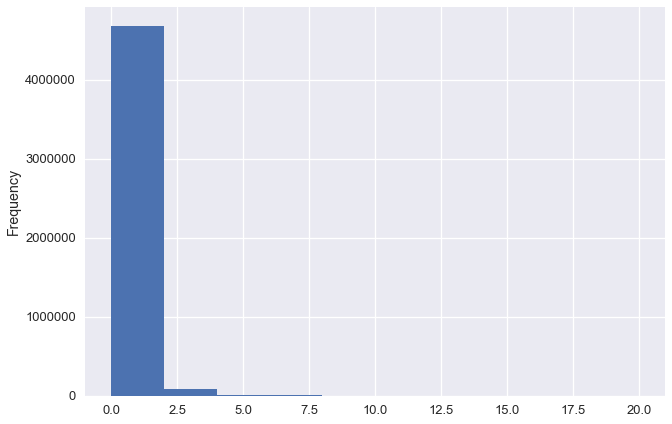

In [14]:
df_kcore['max_kcore'].plot.hist()

In [16]:
max_kcore_lookup = df_kcore['max_kcore'].to_dict()

In [19]:
X_train['max_kcore_q1'] = X_train['extrapolated_id_q1'].map(max_kcore_lookup)
X_train['max_kcore_q2'] = X_train['extrapolated_id_q2'].map(max_kcore_lookup)

In [21]:
X_test['max_kcore_q1'] = X_test['extrapolated_id_q1'].map(max_kcore_lookup)
X_test['max_kcore_q2'] = X_test['extrapolated_id_q2'].map(max_kcore_lookup)

## Save feature names

In [22]:
columns_to_keep = [
    'max_kcore_q1',
    'max_kcore_q2',
]

In [23]:
X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]

In [24]:
feature_names = [
    'magic_max_kcore_q1',
    'magic_max_kcore_q2',
]

In [25]:
save_lines(feature_names, features_data_folder + f'X_train_{feature_list_id}.names')

## Save features

In [26]:
save(X_train.values, features_data_folder + f'X_train_{feature_list_id}.pickle')

In [27]:
save(X_test.values, features_data_folder + f'X_test_{feature_list_id}.pickle')

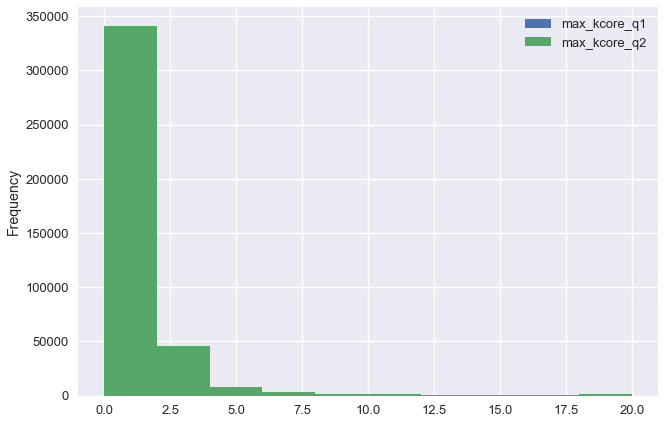

In [28]:
X_train.plot.hist()

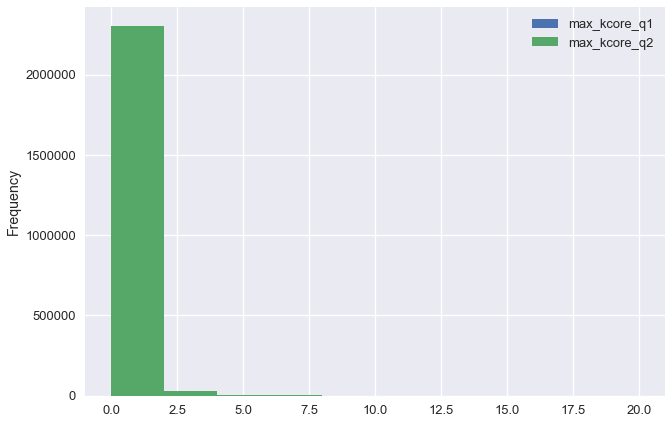

In [29]:
X_test.plot.hist()